In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss

# Introduction
for this question, first i use the adaboostclassifier with decisionTreeClassifier to get the result plot, because for this method, i will automatically update the sample weight.
for the next Step, i will calculate the sample weight and update step by step, and compare the two plot

This is for getting data from the csv file

In [2]:
data = pd.read_csv('C:\\Users\\WesleyZhou\\Desktop\\CS559\\Assignment3\\banana_data.csv',header = None)

X is the 1 and 2 column of the original dataset

In [3]:
col = [1,2]
X = data[col].values
y = data[0].values

Using tran_test_split to get the tran and test dataset

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

For this i define a dadboostclassifier using decisiontree as base estimator with depth of 3, and n_estimators = 10 which means the estimator model number

In [5]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3),n_estimators=10,learning_rate=1,algorithm = 'SAMME.R')

I use the fit method for the X_train and y_train to train the adaboost model

In [6]:
clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=10, random_state=None)

For this step, 
1. i will calculate the error of 10 weak adaboost models, i build two np array for test dataset error and train dataset error
2. i use the staged_predict method from sklearn to get the error of each weak adaboost classifer

In [7]:
adaboost_test_error = np.zeros(10)
for i,y_test_pred in enumerate(clf.staged_predict(X_test)):
    adaboost_test_error[i] = zero_one_loss(y_test_pred,y_test)
    
adaboost_train_error = np.zeros(10)
for j,y_train_pred in enumerate(clf.staged_predict(X_train)):
    adaboost_train_error[j] = zero_one_loss(y_train_pred,y_train)

For this step, i will use a plot to show the train and test error of my adaboost classifier
1. i use the plt
2. i plot both the train and test error using the error data which i already stored in "adaboost_test_error" and "adaboost_train_error" 
3. add the x-axis and y-axis label 
4. using plot.show() to show the plot

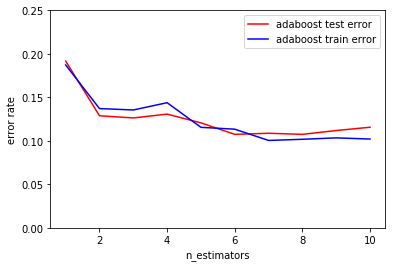

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(np.arange(10)+1,adaboost_test_error,label = 'adaboost test error',color ='red')
ax.plot(np.arange(10)+1,adaboost_train_error,label = 'adaboost train error',color = 'blue')
ax.set_ylim((0.0,0.25))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')
leg=ax.legend(loc='upper right',fancybox=True)
plt.show()

In [9]:
adaboost_train_error

array([0.18733154, 0.13719677, 0.13557951, 0.14393531, 0.11563342,
       0.11347709, 0.10053908, 0.10188679, 0.10350404, 0.10215633])

# Previous method just use the AdaBoostClassifier with decisionTreeClassifier as estimator, and then i gonna calculate the error and update the sample weight by hand(step by step)

Get the decisionTreeClassifier with max_depth = 3

In [10]:
clfDT = DecisionTreeClassifier(max_depth = 3)

In [11]:
train_error = []
test_error = []
clf_models = []

# Round 1
initial the sample weight with 1/positive number for postive y value, and 1/negative for negative y value, So in for loop i first calculate the total number positive and negaive y value and update the the weight sample array which will use in the decisionTreeClassifier fit method

In [12]:
positive = 0
negative = 0
weight1 = []
for i in range(len(y_train)):
    weight1.append(1/len(y_train))

In [13]:
clfDT.fit(X_train,y_train,sample_weight = weight1)
clfDT1 = clfDT

After we fit the model, we need to calculate the error and update the sample weight

In [14]:
round1_y_train = clfDT.predict(X_train)
# test_error.append(zero_one_loss(clfDT.predict(X_test),y_test))
# round1_y_test = clfDT.predict(X_test)

In [15]:
round1_error_index_train = []
count1 = 0
# round1_error_index_test = []
for i in range(len(round1_y_train)):
    if(round1_y_train[i] != y_train[i]):
        round1_error_index_train.append(i)
        count1+=1
# for j in range(len(round1_y_test)):
#     if(round1_y_test[j] != y_test[j]):
#         round1_error_index_test.append(j)

In [16]:
# calculate the error of round 1
error1_train = 0
total_train1 = np.array(weight1).sum()
error1_test = 0
for i in range(len(round1_error_index_train)):
    curPos = round1_error_index_train[i]
    error1_train += weight1[curPos]
error1_train = error1_train/total_train1

# for j in range(len(round1_error_index_test)):
#     curPos = round1_error_index_test[j]
#     error1_test += weight

Get the estimator weight of round 1 weak estimator

In [17]:
estimator_weight1 = 0.5 * np.log((1 - error1_train)/error1_train)

update the sample wegiht with new weight

In [18]:
# for i in range(len(round1_error_index_train)):
#     weight1[i] = weight1[round1_error_index_train[i]]* (1.0 - error1_train)/error1_train
for i in range(len(weight1)):
    weight1[i] = weight1[i] * np.exp(-estimator_weight1 * y_train[i] * round1_y_train[i]) /total_train1

In [19]:
train_error.append(zero_one_loss(round1_y_train,y_train))
test_error.append(zero_one_loss(clfDT.predict(X_test),y_test))

# Round 2

In [20]:
# total_train2 = np.array(weight1).sum()
weight2 = weight1

In [21]:
clfDT2 = DecisionTreeClassifier(max_depth = 3)

In [22]:
clfDT2.fit(X_train,y_train,sample_weight = weight2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
round2_y_train = clfDT2.predict(X_train)
# round2_y_test = clfDT2.predict(X_test)

In [24]:
round2_error_index_train = []
count2 = 0
# round1_error_index_test = []
for i in range(len(round2_y_train)):
    if(round2_y_train[i] != y_train[i]):
        round2_error_index_train.append(i)
        count2+=1

In [25]:
# calculate the error of round 2
error2_train = 0
total_train2 = np.array(weight2).sum()
error2_test = 0
for i in range(len(round2_error_index_train)):
    curPos = round2_error_index_train[i]
    error2_train += weight2[curPos]
error2_train = error2_train/total_train2

In [26]:
estimator_weight2 = 0.5 * np.log((1 - error2_train)/error2_train)

In [27]:
# for i in range(len(round2_error_index_train)):
#     weight2[i] = weight2[round2_error_index_train[i]]* (1.0 - error2_train)/error2_train
for i in range(len(weight2)):
    weight2[i] = weight2[i] * np.exp(-estimator_weight2 * y_train[i] * round2_y_train[i]) /total_train2

# For model we need to combine the round 1 model and round2 model, and using the new model to predict the result and  calculate the error, all the steps from 3 to 10 is follow the same method of round2

In [28]:
round2_model_result = clfDT.predict(X_train)*estimator_weight1+clfDT2.predict(X_train)*estimator_weight2
result2=[1 if i>=0 else -1 for i in round2_model_result]

round2_model_result_test = clfDT.predict(X_test)*estimator_weight1+clfDT2.predict(X_test)*estimator_weight2
result2_test=[1 if i>=0 else -1 for i in round2_model_result_test]

In [29]:
train_error.append(zero_one_loss(result2,y_train))
test_error.append(zero_one_loss(result2_test,y_test))

# Round 3

In [30]:
# total_train3 = np.array(weight2).sum()
weight3 = weight2

clfDT3 = DecisionTreeClassifier(max_depth = 3)
clfDT3.fit(X_train,y_train,sample_weight = weight3)

round3_y_train = clfDT3.predict(X_train)
# test_error.append(zero_one_loss(clfDT3.predict(X_test),y_test))

round3_error_index_train = []
count3 = 0
# round1_error_index_test = []
for i in range(len(round3_y_train)):
    if(round3_y_train[i] != y_train[i]):
        round3_error_index_train.append(i)
        count3+=1
        
# calculate the error of round 3
error3_train = 0
total_train3 = np.array(weight3).sum()
error3_test = 0
for i in range(len(round3_error_index_train)):
    curPos = round3_error_index_train[i]
    error3_train += weight3[curPos]
error3_train = error3_train/total_train3

#estimator 3
estimator_weight3 = 0.5 * np.log((1 - error3_train)/error3_train)

# update weight
for i in range(len(weight3)):
    weight3[i] = weight3[i] * np.exp(-estimator_weight3 * y_train[i] * round3_y_train[i]) /total_train3

In [31]:
round3_model_result = clfDT.predict(X_train)*estimator_weight1+clfDT2.predict(X_train)*estimator_weight2 + clfDT3.predict(X_train)*estimator_weight3
result3=[1 if i>=0 else -1 for i in round2_model_result]

round3_model_result_test = clfDT.predict(X_test)*estimator_weight1+clfDT2.predict(X_test)*estimator_weight2 + clfDT3.predict(X_test)*estimator_weight3
result3_test=[1 if i>=0 else -1 for i in round3_model_result_test]

In [32]:
train_error.append(zero_one_loss(result3,y_train))
test_error.append(zero_one_loss(result3_test,y_test))

# Round 4

In [33]:
# total_train4 = np.array(weight3).sum()
weight4 = weight3

clfDT4 = DecisionTreeClassifier(max_depth = 3)
clfDT4.fit(X_train,y_train,sample_weight = weight4)

round4_y_train = clfDT4.predict(X_train)
# test_error.append(zero_one_loss(clfDT4.predict(X_test),y_test))

round4_error_index_train = []
count4 = 0
# round1_error_index_test = []
for i in range(len(round4_y_train)):
    if(round4_y_train[i] != y_train[i]):
        round4_error_index_train.append(i)
        count4+=1
        
# calculate the error of round 4
error4_train = 0
total_train4 = np.array(weight4).sum()
error4_test = 0
for i in range(len(round4_error_index_train)):
    curPos = round4_error_index_train[i]
    error4_train += weight4[curPos]
error4_train = error4_train/total_train4

#estimator 4
estimator_weight4 = 0.5 * np.log((1 - error4_train)/error4_train)

# update weight
for i in range(len(weight4)):
    weight4[i] = weight4[i] * np.exp(-estimator_weight4 * y_train[i] * round4_y_train[i]) /total_train4

In [34]:
round4_model_result = clfDT.predict(X_train)*estimator_weight1+clfDT2.predict(X_train)*estimator_weight2 + clfDT3.predict(X_train)*estimator_weight3+ clfDT4.predict(X_train)*estimator_weight4
result4=[1 if i>=0 else -1 for i in round4_model_result]

round4_model_result_test = clfDT.predict(X_test)*estimator_weight1+clfDT2.predict(X_test)*estimator_weight2 + clfDT3.predict(X_test)*estimator_weight3+ clfDT4.predict(X_test)*estimator_weight4
result4_test=[1 if i>=0 else -1 for i in round4_model_result_test]

In [35]:
train_error.append(zero_one_loss(result4,y_train))
test_error.append(zero_one_loss(result4_test,y_test))

# Round 5

In [36]:
weight5 = weight4

clfDT5 = DecisionTreeClassifier(max_depth = 3)
clfDT5.fit(X_train,y_train,sample_weight = weight5)

round5_y_train = clfDT5.predict(X_train)
# test_error.append(zero_one_loss(clfDT5.predict(X_test),y_test))

round5_error_index_train = []
count5 = 0
# round1_error_index_test = []
for i in range(len(round5_y_train)):
    if(round5_y_train[i] != y_train[i]):
        round5_error_index_train.append(i)
        count5+=1
        
# calculate the error of round 5
error5_train = 0
total_train5 = np.array(weight5).sum()
error5_test = 0
for i in range(len(round5_error_index_train)):
    curPos = round5_error_index_train[i]
    error5_train += weight5[curPos]
error5_train = error5_train/total_train5

#estimator 5
estimator_weight5 = 0.5 * np.log((1 - error5_train)/error5_train)

# update weight
for i in range(len(weight5)):
    weight5[i] = weight5[i] * np.exp(-estimator_weight5 * y_train[i] * round5_y_train[i]) /total_train5

In [37]:
round5_model_result = clfDT.predict(X_train)*estimator_weight1+clfDT2.predict(X_train)*estimator_weight2 + clfDT3.predict(X_train)*estimator_weight3 + clfDT4.predict(X_train)*estimator_weight4 + clfDT5.predict(X_train)*estimator_weight5
result5=[1 if i>=0 else -1 for i in round5_model_result]

round5_model_result_test = clfDT.predict(X_test)*estimator_weight1+clfDT2.predict(X_test)*estimator_weight2 + clfDT3.predict(X_test)*estimator_weight3 + clfDT4.predict(X_test)*estimator_weight4 + clfDT5.predict(X_test)*estimator_weight5
result5_test=[1 if i>=0 else -1 for i in round5_model_result_test]

In [38]:
train_error.append(zero_one_loss(result5,y_train))
test_error.append(zero_one_loss(result5_test,y_test))

# Round 6

In [39]:
weight6 = weight5

clfDT6 = DecisionTreeClassifier(max_depth = 3)
clfDT6.fit(X_train,y_train,sample_weight = weight6)

round6_y_train = clfDT6.predict(X_train)
# test_error.append(zero_one_loss(clfDT6.predict(X_test),y_test))

round6_error_index_train = []
count6 = 0
# round1_error_index_test = []
for i in range(len(round6_y_train)):
    if(round6_y_train[i] != y_train[i]):
        round6_error_index_train.append(i)
        count6+=1
        
# calculate the error of round 6
error6_train = 0
total_train6 = np.array(weight6).sum()
error6_test = 0
for i in range(len(round6_error_index_train)):
    curPos = round6_error_index_train[i]
    error6_train += weight6[curPos]
error6_train = error6_train/total_train6

#estimator 6
estimator_weight6 = 0.5 * np.log((1 - error6_train)/error6_train)

# update weight
for i in range(len(weight6)):
    weight6[i] = weight6[i] * np.exp(-estimator_weight6 * y_train[i] * round6_y_train[i]) /total_train6

In [40]:
round6_model_result = clfDT.predict(X_train)*estimator_weight1+clfDT2.predict(X_train)*estimator_weight2 + clfDT3.predict(X_train)*estimator_weight3 + clfDT4.predict(X_train)*estimator_weight4 + clfDT5.predict(X_train)*estimator_weight5 + clfDT6.predict(X_train)*estimator_weight6
result6=[1 if i>=0 else -1 for i in round6_model_result]

round6_model_result_test = clfDT.predict(X_test)*estimator_weight1+clfDT2.predict(X_test)*estimator_weight2 + clfDT3.predict(X_test)*estimator_weight3 + clfDT4.predict(X_test)*estimator_weight4 + clfDT5.predict(X_test)*estimator_weight5 + clfDT6.predict(X_test)*estimator_weight6
result6_test=[1 if i>=0 else -1 for i in round6_model_result_test]

In [41]:
train_error.append(zero_one_loss(result6,y_train))
test_error.append(zero_one_loss(result6_test,y_test))

# Round 7

In [42]:
weight7 = weight6

clfDT7 = DecisionTreeClassifier(max_depth = 3)
clfDT7.fit(X_train,y_train,sample_weight = weight7)

round7_y_train = clfDT7.predict(X_train)
# test_error.append(zero_one_loss(clfDT7.predict(X_test),y_test))

round7_error_index_train = []
count7 = 0
# round1_error_index_test = []
for i in range(len(round7_y_train)):
    if(round7_y_train[i] != y_train[i]):
        round7_error_index_train.append(i)
        count7+=1
        
# calculate the error of round 7
error7_train = 0
total_train7 = np.array(weight7).sum()
error7_test = 0
for i in range(len(round7_error_index_train)):
    curPos = round7_error_index_train[i]
    error7_train += weight7[curPos]
error7_train = error7_train/total_train7

#estimator 7
estimator_weight7 = 0.5 * np.log((1 - error7_train)/error7_train)

# update weight
for i in range(len(weight7)):
    weight7[i] = weight7[i] * np.exp(-estimator_weight7 * y_train[i] * round7_y_train[i]) /total_train7

In [43]:
round7_model_result = clfDT.predict(X_train)*estimator_weight1+clfDT2.predict(X_train)*estimator_weight2 + clfDT3.predict(X_train)*estimator_weight3 + clfDT4.predict(X_train)*estimator_weight4 + clfDT5.predict(X_train)*estimator_weight5 + clfDT6.predict(X_train)*estimator_weight6 + clfDT7.predict(X_train)*estimator_weight7
result7=[1 if i>=0 else -1 for i in round7_model_result]

round7_model_result_test = clfDT.predict(X_test)*estimator_weight1+clfDT2.predict(X_test)*estimator_weight2 + clfDT3.predict(X_test)*estimator_weight3 + clfDT4.predict(X_test)*estimator_weight4 + clfDT5.predict(X_test)*estimator_weight5 + clfDT6.predict(X_test)*estimator_weight6 + clfDT7.predict(X_test)*estimator_weight7
result7_test=[1 if i>=0 else -1 for i in round7_model_result_test]

In [44]:
train_error.append(zero_one_loss(result7,y_train))
test_error.append(zero_one_loss(result7_test,y_test))

# Round 8

In [45]:
weight8 = weight7

clfDT8 = DecisionTreeClassifier(max_depth = 3)
clfDT8.fit(X_train,y_train,sample_weight = weight8)

round8_y_train = clfDT8.predict(X_train)
# test_error.append(zero_one_loss(clfDT8.predict(X_test),y_test))

round8_error_index_train = []
count8 = 0
# round1_error_index_test = []
for i in range(len(round8_y_train)):
    if(round8_y_train[i] != y_train[i]):
        round8_error_index_train.append(i)
        count8+=1
        
# calculate the error of round 8
error8_train = 0
total_train8 = np.array(weight8).sum()
error8_test = 0
for i in range(len(round8_error_index_train)):
    curPos = round8_error_index_train[i]
    error8_train += weight8[curPos]
error8_train = error8_train/total_train8

#estimator 8
estimator_weight8 = 0.5 * np.log((1 - error8_train)/error8_train)

# update weight
for i in range(len(weight8)):
    weight8[i] = weight8[i] * np.exp(-estimator_weight8 * y_train[i] * round8_y_train[i]) /total_train8

In [46]:
round8_model_result = clfDT.predict(X_train)*estimator_weight1+clfDT2.predict(X_train)*estimator_weight2 + clfDT3.predict(X_train)*estimator_weight3 + clfDT4.predict(X_train)*estimator_weight4 + clfDT5.predict(X_train)*estimator_weight5 + clfDT6.predict(X_train)*estimator_weight6 + clfDT7.predict(X_train)*estimator_weight7 + clfDT8.predict(X_train)*estimator_weight8
result8=[1 if i>=0 else -1 for i in round8_model_result]

round8_model_result_test = clfDT.predict(X_test)*estimator_weight1+clfDT2.predict(X_test)*estimator_weight2 + clfDT3.predict(X_test)*estimator_weight3 + clfDT4.predict(X_test)*estimator_weight4 + clfDT5.predict(X_test)*estimator_weight5 + clfDT6.predict(X_test)*estimator_weight6 + clfDT7.predict(X_test)*estimator_weight7 + clfDT8.predict(X_test)*estimator_weight8
result8_test=[1 if i>=0 else -1 for i in round8_model_result_test]

In [47]:
train_error.append(zero_one_loss(result8,y_train))
test_error.append(zero_one_loss(result8_test,y_test))

# Round 9

In [48]:
weight9 = weight8

clfDT9 = DecisionTreeClassifier(max_depth = 3)
clfDT9.fit(X_train,y_train,sample_weight = weight9)

round9_y_train = clfDT9.predict(X_train)
# test_error.append(zero_one_loss(clfDT9.predict(X_test),y_test))

round9_error_index_train = []
count9 = 0
# round1_error_index_test = []
for i in range(len(round9_y_train)):
    if(round9_y_train[i] != y_train[i]):
        round9_error_index_train.append(i)
        count9+=1
        
# calculate the error of round 9
error9_train = 0
total_train9 = np.array(weight9).sum()
error9_test = 0
for i in range(len(round9_error_index_train)):
    curPos = round9_error_index_train[i]
    error9_train += weight9[curPos]
error9_train = error9_train/total_train9

#estimator 9
estimator_weight9 = 0.5 * np.log((1 - error9_train)/error9_train)

# update weight
for i in range(len(weight9)):
    weight9[i] = weight9[i] * np.exp(-estimator_weight9 * y_train[i] * round9_y_train[i]) /total_train9

In [49]:
round9_model_result = clfDT.predict(X_train)*estimator_weight1+clfDT2.predict(X_train)*estimator_weight2 + clfDT3.predict(X_train)*estimator_weight3 + clfDT4.predict(X_train)*estimator_weight4 + clfDT5.predict(X_train)*estimator_weight5 + clfDT6.predict(X_train)*estimator_weight6 + clfDT7.predict(X_train)*estimator_weight7 + clfDT8.predict(X_train)*estimator_weight8 + clfDT9.predict(X_train)*estimator_weight9
result9=[1 if i>=0 else -1 for i in round9_model_result]

round9_model_result_test = clfDT.predict(X_test)*estimator_weight1+clfDT2.predict(X_test)*estimator_weight2 + clfDT3.predict(X_test)*estimator_weight3 + clfDT4.predict(X_test)*estimator_weight4 + clfDT5.predict(X_test)*estimator_weight5 + clfDT6.predict(X_test)*estimator_weight6 + clfDT7.predict(X_test)*estimator_weight7 + clfDT8.predict(X_test)*estimator_weight8 + clfDT9.predict(X_test)*estimator_weight9
result9_test=[1 if i>=0 else -1 for i in round9_model_result_test]

In [50]:
train_error.append(zero_one_loss(result9,y_train))
test_error.append(zero_one_loss(result9_test,y_test))

# Round 10

In [51]:
weight10 = weight9

clfDT10 = DecisionTreeClassifier(max_depth = 3)
clfDT10.fit(X_train,y_train,sample_weight = weight10)

round10_y_train = clfDT10.predict(X_train)
# test_error.append(zero_one_loss(clfDT10.predict(X_test),y_test))

round10_error_index_train = []
count10 = 0
# round1_error_index_test = []
for i in range(len(round10_y_train)):
    if(round10_y_train[i] != y_train[i]):
        round10_error_index_train.append(i)
        count10+=1
        
# calculate the error of round 10
error10_train = 0
total_train10 = np.array(weight10).sum()
error10_test = 0
for i in range(len(round10_error_index_train)):
    curPos = round10_error_index_train[i]
    error10_train += weight10[curPos]
error10_train = error10_train/total_train10

#estimator 10
estimator_weight10 = 0.5 * np.log((1 - error10_train)/error10_train)

# update weight
for i in range(len(weight10)):
    weight10[i] = weight10[i] * np.exp(-estimator_weight10 * y_train[i] * round10_y_train[i]) /total_train10

In [52]:
round10_model_result = clfDT.predict(X_train)*estimator_weight1+clfDT2.predict(X_train)*estimator_weight2 + clfDT3.predict(X_train)*estimator_weight3 + clfDT4.predict(X_train)*estimator_weight4 + clfDT5.predict(X_train)*estimator_weight5 + clfDT6.predict(X_train)*estimator_weight6 + clfDT7.predict(X_train)*estimator_weight7 + clfDT8.predict(X_train)*estimator_weight8 + clfDT9.predict(X_train)*estimator_weight9 + clfDT10.predict(X_train)*estimator_weight10
result10=[1 if i>=0 else -1 for i in round10_model_result]

round10_model_result_test = clfDT.predict(X_test)*estimator_weight1+clfDT2.predict(X_test)*estimator_weight2 + clfDT3.predict(X_test)*estimator_weight3 + clfDT4.predict(X_test)*estimator_weight4 + clfDT5.predict(X_test)*estimator_weight5 + clfDT6.predict(X_test)*estimator_weight6 + clfDT7.predict(X_test)*estimator_weight7 + clfDT8.predict(X_test)*estimator_weight8 + clfDT9.predict(X_test)*estimator_weight9 + clfDT10.predict(X_test)*estimator_weight10
result10_test=[1 if i>=0 else -1 for i in round10_model_result_test]

In [53]:
train_error.append(zero_one_loss(result10,y_train))
test_error.append(zero_one_loss(result10_test,y_test))

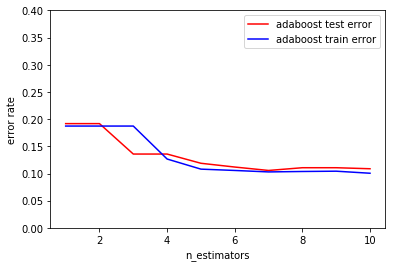

In [54]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(np.arange(10)+1,test_error,label = 'adaboost test error',color ='red')
ax.plot(np.arange(10)+1,train_error,label = 'adaboost train error',color = 'blue')
ax.set_ylim((0.0,0.4))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')
leg=ax.legend(loc='upper right',fancybox=True)
plt.show()

# Observation

we can see that, from the round1 to round 10, the error is getting moew and moew low, so we can say that the classifier is getting more and more accurate, and we can see that the two plot is alomost the same and in round 10, the error is the same which is around 0.1